In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels import api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

In [4]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [5]:
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married", 
                                       6: "Living with partner", 77: "Refused", 9: "Don't know"}).fillna("Missing")
da.DMDMARTLx.value_counts()

Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Missing                 261
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64

In [6]:
da["RIAGENDRx"]=da.RIAGENDR.replace({1:"Male", 2: "Female"})
da.RIAGENDRx.value_counts()

Female    2976
Male      2759
Name: RIAGENDRx, dtype: int64

In [7]:
da[da["RIAGENDRx"]=="Female"].DMDMARTLx.value_counts()

Married                1303
Never married           520
Divorced                350
Widowed                 296
Living with partner     262
Missing                 126
Separated               118
Refused                   1
Name: DMDMARTLx, dtype: int64

In [8]:
da[da["RIAGENDRx"]=="Male"].DMDMARTLx.value_counts()

Married                1477
Never married           484
Living with partner     265
Divorced                229
Missing                 135
Widowed                 100
Separated                68
Refused                   1
Name: DMDMARTLx, dtype: int64

In [9]:
da[da["RIAGENDRx"]=="Female"].DMDMARTLx.value_counts()/da[da["RIAGENDRx"]=="Female"].shape[0]

Married                0.437836
Never married          0.174731
Divorced               0.117608
Widowed                0.099462
Living with partner    0.088038
Missing                0.042339
Separated              0.039651
Refused                0.000336
Name: DMDMARTLx, dtype: float64

In [11]:
da[da["RIAGENDRx"]=="Male"].DMDMARTLx.value_counts()/da[da["RIAGENDRx"]=="Male"].shape[0]

Married                0.535339
Never married          0.175426
Living with partner    0.096049
Divorced               0.083001
Missing                0.048931
Widowed                0.036245
Separated              0.024647
Refused                0.000362
Name: DMDMARTLx, dtype: float64

In [13]:
daFemale = da[da["RIAGENDRx"]=="Female"]

In [14]:
daMale = da[da["RIAGENDRx"]=="Male"]

In [17]:
daFemale[(daFemale["RIDAGEYR"]>=30) & (daFemale["RIDAGEYR"]<=40)].DMDMARTLx.value_counts()

Married                285
Never married          116
Living with partner     65
Divorced                46
Separated               18
Widowed                  2
Name: DMDMARTLx, dtype: int64

In [27]:
daFemale[(daFemale["RIDAGEYR"]>=30) & (daFemale["RIDAGEYR"]<=40)].DMDMARTLx.value_counts()/daFemale[(daFemale["RIDAGEYR"]>=30) & (daFemale["RIDAGEYR"]<=40)].shape[0]

Married                0.535714
Never married          0.218045
Living with partner    0.122180
Divorced               0.086466
Separated              0.033835
Widowed                0.003759
Name: DMDMARTLx, dtype: float64

In [19]:
daMale[(daMale["RIDAGEYR"]>=30) & (daMale["RIDAGEYR"]<=40)].DMDMARTLx.value_counts()/daMale[(daMale["RIDAGEYR"]>=30) & (daMale["RIDAGEYR"]<=40)].shape[0]

Married                0.556680
Never married          0.204453
Living with partner    0.157895
Divorced               0.048583
Separated              0.024291
Widowed                0.006073
Refused                0.002024
Name: DMDMARTLx, dtype: float64

In [32]:
dx = da.groupby("RIAGENDRx")["DMDMARTLx"].value_counts().unstack()
dx

DMDMARTLx,Divorced,Living with partner,Married,Missing,Never married,Refused,Separated,Widowed
RIAGENDRx,,,,,,,,
Female,350,262,1303,126,520,1,118,296
Male,229,265,1477,135,484,1,68,100


In [33]:
dx = dx.apply(lambda x: x/x.sum(), axis=0)
print(dx.to_string(float_format="%.4f"))

DMDMARTLx  Divorced  Living with partner  Married  Missing  Never married  Refused  Separated  Widowed
RIAGENDRx                                                                                             
Female       0.6045               0.4972   0.4687   0.4828         0.5179   0.5000     0.6344   0.7475
Male         0.3955               0.5028   0.5313   0.5172         0.4821   0.5000     0.3656   0.2525


In [30]:
dx = da.groupby(["DMDMARTLx"])["RIAGENDRx"].value_counts().unstack()
dx = dx.apply(lambda x: x/x.sum(), axis=0)
print(dx.to_string(float_format="%.4f"))

RIAGENDRx            Female   Male
DMDMARTLx                         
Divorced             0.1176 0.0830
Living with partner  0.0880 0.0960
Married              0.4378 0.5353
Missing              0.0423 0.0489
Never married        0.1747 0.1754
Refused              0.0003 0.0004
Separated            0.0397 0.0246
Widowed              0.0995 0.0362


In [34]:
da["RIDAGEYR"].max()

80

In [35]:
da["RIDAGEYR"].min()

18

In [37]:
daFemale["agegrp2"] = pd.cut(da.RIDAGEYR, [10, 20, 30, 40, 50, 60, 70, 80])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
dx = daFemale.groupby("agegrp2")["DMDMARTLx"].value_counts().unstack()

In [39]:
dx

DMDMARTLx,Divorced,Living with partner,Married,Missing,Never married,Refused,Separated,Widowed
agegrp2,,,,,,,,
"(10, 20]",NaN,8.0,1.0,126.0,30.0,NaN,NaN,NaN
"(20, 30]",11.0,106.0,157.0,NaN,229.0,NaN,11.0,NaN
"(30, 40]",43.0,57.0,258.0,NaN,97.0,NaN,17.0,2.0
"(40, 50]",69.0,37.0,288.0,NaN,63.0,NaN,33.0,12.0
"(50, 60]",83.0,32.0,257.0,NaN,42.0,1.0,27.0,28.0
"(60, 70]",85.0,19.0,212.0,NaN,38.0,NaN,22.0,65.0
"(70, 80]",59.0,3.0,130.0,NaN,21.0,NaN,8.0,189.0


In [41]:
dx = dx.apply(lambda y: y/y.sum(), axis=0)
print(dx.to_string(float_format="%0.2f"))

DMDMARTLx  Divorced  Living with partner  Married  Missing  Never married  Refused  Separated  Widowed
agegrp2                                                                                               
(10, 20]        NaN                 0.03     0.00     1.00           0.06      NaN        NaN      NaN
(20, 30]       0.03                 0.40     0.12      NaN           0.44      NaN       0.09      NaN
(30, 40]       0.12                 0.22     0.20      NaN           0.19      NaN       0.14     0.01
(40, 50]       0.20                 0.14     0.22      NaN           0.12      NaN       0.28     0.04
(50, 60]       0.24                 0.12     0.20      NaN           0.08     1.00       0.23     0.09
(60, 70]       0.24                 0.07     0.16      NaN           0.07      NaN       0.19     0.22
(70, 80]       0.17                 0.01     0.10      NaN           0.04      NaN       0.07     0.64


In [43]:
(daFemale.groupby(["agegrp2", "DMDMARTLx"]).size()/daFemale.groupby(["agegrp2"]).size()).unstack()

DMDMARTLx,Divorced,Living with partner,Married,Missing,Never married,Refused,Separated,Widowed
agegrp2,,,,,,,,
"(10, 20]",NaN,0.048485,0.006061,0.763636,0.181818,NaN,NaN,NaN
"(20, 30]",0.021401,0.206226,0.305447,NaN,0.445525,NaN,0.021401,NaN
"(30, 40]",0.090717,0.120253,0.544304,NaN,0.204641,NaN,0.035865,0.004219
"(40, 50]",0.137450,0.073705,0.573705,NaN,0.125498,NaN,0.065737,0.023904
"(50, 60]",0.176596,0.068085,0.546809,NaN,0.089362,0.002128,0.057447,0.059574
"(60, 70]",0.192744,0.043084,0.480726,NaN,0.086168,NaN,0.049887,0.147392
"(70, 80]",0.143902,0.007317,0.317073,NaN,0.051220,NaN,0.019512,0.460976


In [46]:
daMale["agegrp2"] = pd.cut(da.RIDAGEYR, [10, 20, 30, 40, 50, 60, 70, 80])
(daMale.groupby(["agegrp2", "DMDMARTLx"]).size()/daMale.groupby(["agegrp2"]).size()).unstack()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


DMDMARTLx,Divorced,Living with partner,Married,Missing,Never married,Refused,Separated,Widowed
agegrp2,,,,,,,,
"(10, 20]",NaN,0.017143,0.005714,0.771429,0.205714,NaN,NaN,NaN
"(20, 30]",0.004630,0.212963,0.238426,NaN,0.523148,NaN,0.016204,0.004630
"(30, 40]",0.052402,0.157205,0.563319,NaN,0.194323,0.002183,0.026201,0.004367
"(40, 50]",0.084788,0.082294,0.703242,NaN,0.097257,NaN,0.027431,0.004988
"(50, 60]",0.125551,0.074890,0.651982,NaN,0.103524,NaN,0.022026,0.022026
"(60, 70]",0.125858,0.050343,0.665904,NaN,0.086957,NaN,0.032037,0.038902
"(70, 80]",0.141791,0.022388,0.611940,NaN,0.022388,NaN,0.034826,0.166667


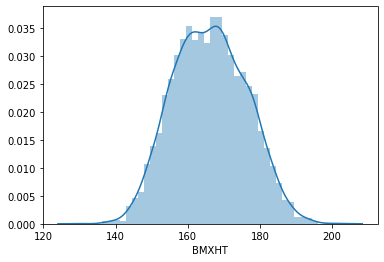

In [47]:
sns.distplot(da.BMXHT.dropna())

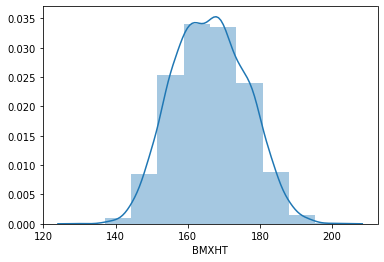

In [48]:
sns.distplot(da.BMXHT.dropna(), bins = 10)

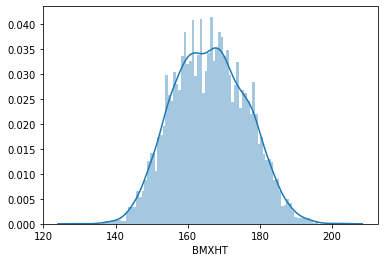

In [49]:
sns.distplot(da.BMXHT.dropna(), bins = 100)

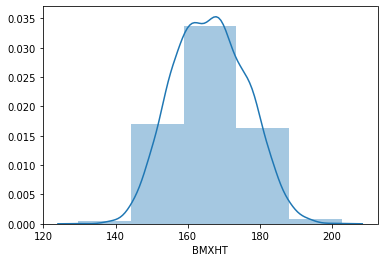

In [50]:
sns.distplot(da.BMXHT.dropna(), bins = 5)

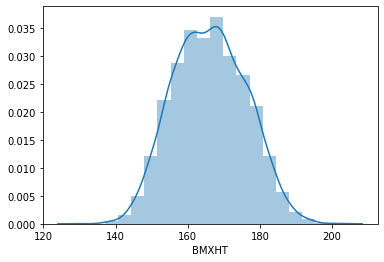

In [51]:
sns.distplot(da.BMXHT.dropna(), bins = 20)

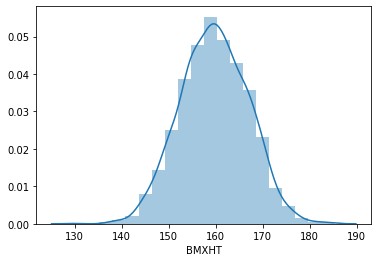

In [56]:
sns.distplot(daFemale.BMXHT.dropna(), bins = 20)

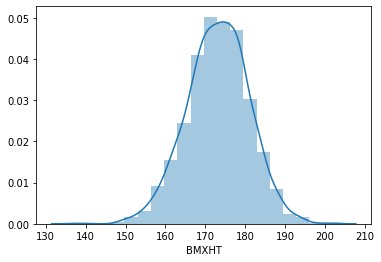

In [57]:
sns.distplot(daMale.BMXHT.dropna(), bins=20)

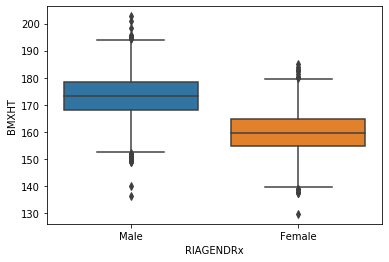

In [58]:
sns.boxplot(x="RIAGENDRx", y = "BMXHT", data=da)

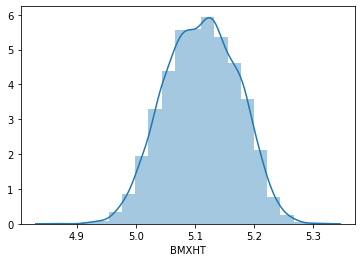

In [60]:
sns.distplot(np.log(da.BMXHT).dropna(), bins = 20)

Question4

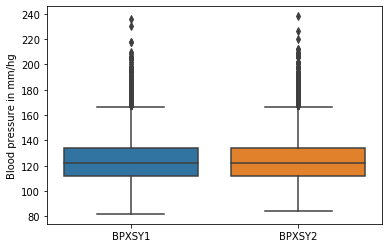

In [62]:
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2"]])
_ = bp.set_ylabel("Blood pressure in mm/hg")

In [63]:
num = 0
for i in (da["BPXSY2"]-da["BPXSY1"]):
    if i < 0 :
        num += 1
num/len(da)

0.42946817785527464

In [64]:
len(da[da["BPXSY2"]-da["BPXSY1"] < 0])/len(da)

0.42946817785527464

Question5

In [ ]:
dx = da.groupby(["DMDMARTLx"])["RIAGENDRx"].value_counts().unstack()
dx = dx.apply(lambda x: x/x.sum(), axis=0)
print(dx.to_string(float_format="%.4f"))

In [73]:
dx = da.groupby(["DMDEDUC2"])["DMDHHSIZ"].value_counts().unstack()
dx =dx.apply(lambda x: x/x.sum(), axis=1)
print(dx.to_string(float_format="%.2f"))

DMDHHSIZ    1    2    3    4    5    6    7
DMDEDUC2                                   
1.0      0.11 0.22 0.15 0.13 0.15 0.11 0.13
2.0      0.12 0.22 0.16 0.15 0.15 0.11 0.09
3.0      0.15 0.27 0.17 0.16 0.11 0.07 0.07
4.0      0.15 0.27 0.19 0.17 0.12 0.05 0.05
5.0      0.14 0.35 0.19 0.17 0.10 0.03 0.03
9.0       NaN 0.67  NaN  NaN 0.33  NaN  NaN


In [70]:
daRes = da[(da["RIDAGEYR"]>=30) & (da["RIDAGEYR"]<=40)]#RIAGENDR

In [75]:
daRes.groupby(["DMDEDUC2", "RIAGENDRx"])["DMDHHSIZ"].median().unstack()

RIAGENDRx,Female,Male
DMDEDUC2,,
1.0,5.0,5.0
2.0,5.0,4.5
3.0,5.0,4.0
4.0,4.0,4.0
5.0,3.0,3.0


In [76]:
daRes.groupby(["DMDEDUC2", "RIAGENDRx"])["DMDHHSIZ"].median()

DMDEDUC2  RIAGENDRx
1.0       Female       5.0
          Male         5.0
2.0       Female       5.0
          Male         4.5
3.0       Female       5.0
          Male         4.0
4.0       Female       4.0
          Male         4.0
5.0       Female       3.0
          Male         3.0
Name: DMDHHSIZ, dtype: float64

In [78]:
(da.groupby(["SDMVSTRA", "SDMVPSU", "RIAGENDR"])[["RIDAGEYR", "BMXHT", "BMXBMI"]].mean()).unstack()

RIDAGEYR                  BMXHT                 BMXBMI  \
RIAGENDR                  1          2           1           2          1   
SDMVSTRA SDMVPSU                                                            
119      1        47.861111  47.663265  172.741667  159.570408  26.958333   
         2        54.363636  52.987952  172.906818  159.244578  27.160465   
120      1        43.130000  43.636364  169.537755  155.402041  30.939175   
         2        45.219178  43.736111  173.075342  159.218056  27.727397   
121      1        46.750000  44.397959  172.177885  158.871579  29.416505   
         2        42.063158  44.376344  174.764516  160.229032  26.273118   
122      1        44.653061  42.897436  173.998969  161.315385  28.528866   
         2        44.320000  47.333333  170.332323  157.231111  25.744444   
123      1        47.829787  44.841121  174.315217  162.059615  29.231522   
         2        52.126582  46.457447  174.454430  160.476596  28.811392   
124      1        50.750000  51.664000  172.109009  158.788710  28.614414   
         2        48.245614  42.541667  174.291228  162.853521  27.714035   
125      1        55.165289  50.900901  173.631092  160.762385  29.727731   
         2        49.705882  51.660000  174.456863  160.021429  29.143564   
126      1        48.416667  46.229167  175.149398  160.387500  29.033333   
         2        48.666667  47.205882  174.713043  160.892000  29.039130   
127      1        53.137931  49.694444  171.545349  157.422430  31.062353   
         2        54.070588  51.486239  173.366667  159.022936  30.557831   
128      1        53.673267  55.638462  169.325000  156.339062  31.749000   
         2        45.822785  45.589744  172.400000  160.437179  26.835443   
129      1        43.922222  45.329787  171.094318  156.900000  26.493182   
         2        45.775510  43.500000  173.138298  161.034259  28.961702   
130      1        50.516854  47.810526  176.974157  161.977895  30.337079   
         2        50.535354  50.833333  175.061224  160.060577  29.237755   
131      1        53.140187  54.893617  175.610476  161.989362  28.259615   
         2        46.778846  45.000000  175.091346  161.673810  30.077885   
132      1        42.380435  43.210526  172.534066  161.508421  28.546154   
         2        49.038760  51.700000  172.809524  159.138281  28.966667   
133      1        44.054795  45.105882  171.509722  158.295122  27.495833   
         2        47.489796  47.063158  171.179167  158.627368  27.966667   

                             
RIAGENDR                  2  
SDMVSTRA SDMVPSU             
119      1        30.052041  
         2        27.849398  
120      1        32.419388  
         2        27.400000  
121      1        30.856842  
         2        26.470968  
122      1        29.447436  
         2        26.611111  
123      1        29.905769  
         2        30.641489  
124      1        29.533065  
         2        28.640845  
125      1        30.385321  
         2        28.564286  
126      1        31.262500  
         2        29.612121  
127      1        32.189720  
         2        30.770642  
128      1        32.303125  
         2        27.491026  
129      1        29.019149  
         2        29.429630  
130      1        30.700000  
         2        31.490385  
131      1        30.061702  
         2        32.984127  
132      1        29.848421  
         2        30.540625  
133      1        27.959259  
         2        29.000000

In [84]:
(da.groupby(["SDMVSTRA", "SDMVPSU", "RIAGENDR"])[["RIDAGEYR", "BMXHT", "BMXBMI"]].quantile(.75)).unstack()

0.75             RIDAGEYR           BMXHT           BMXBMI        
RIAGENDR                1      2        1        2       1       2
SDMVSTRA SDMVPSU                                                  
119      1          62.25  62.75  177.825  163.900  28.500  33.675
         2          69.00  69.00  178.225  164.300  29.400  31.850
120      1          55.50  57.00  175.800  159.800  35.100  36.900
         2          59.00  54.25  178.900  164.400  30.600  30.850
121      1          63.00  57.50  177.700  163.650  33.000  34.600
         2          53.50  56.00  179.300  164.800  28.100  29.600
122      1          58.75  55.00  178.600  166.925  31.500  33.575
         2          58.00  60.00  175.200  161.075  27.600  30.900
123      1          61.00  60.00  179.025  167.200  32.625  34.425
         2          67.00  62.75  178.400  165.800  32.750  34.775
124      1          65.00  64.00  176.700  163.325  31.350  33.250
         2          65.00  52.50  179.600  167.650  31.700  31.600
125      1          70.00  65.00  178.900  165.400  33.500  33.700
         2          65.75  67.00  178.825  165.200  33.300  33.650
126      1          66.25  61.00  180.700  164.500  32.700  36.400
         2          66.00  62.75  179.000  167.300  31.700  34.300
127      1          68.00  63.00  176.675  160.850  34.700  37.650
         2          68.00  65.00  179.100  164.700  33.350  34.500
128      1          69.00  70.00  174.450  160.725  34.450  35.975
         2          57.00  55.00  177.250  165.625  29.350  31.625
129      1          53.75  57.00  177.400  162.600  29.125  33.050
         2          60.00  56.25  178.400  165.625  31.300  33.000
130      1          69.00  65.00  182.100  166.850  33.100  35.800
         2          64.50  65.25  179.300  165.725  32.700  34.700
131      1          72.50  77.00  180.400  167.175  31.825  35.300
         2          60.00  55.00  178.725  165.475  33.425  37.475
132      1          52.25  58.00  178.200  166.950  31.200  34.700
         2          69.00  69.00  178.475  164.300  33.425  35.325
133      1          59.00  61.00  176.000  162.625  30.625  32.100
         2          62.25  60.50  175.925  163.450  29.875  32.850

In [85]:
dage = (da.groupby(["SDMVSTRA", "SDMVPSU", "RIAGENDR"])[["RIDAGEYR", "BMXHT", "BMXBMI"]].mean()).unstack()

In [86]:
dage["RIDAGEYR"].min()/dage["RIDAGEYR"].max()

RIAGENDR
1    0.762493
2    0.764609
dtype: float64

In [88]:
dage["BMXHT"].min()/dage["BMXHT"].max()

RIAGENDR
1    0.956778
2    0.954244
dtype: float64

In [89]:
dage["BMXBMI"].min()/dage["BMXBMI"].max()

RIAGENDR
1    0.810874
2    0.802537
dtype: float64